In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Read the CSV file
df_user = pd.read_csv('./data/user_demand_cambridge_oct10.csv')
df_food= pd.read_csv('./data/fooddeliverytrips_cambridge.csv')

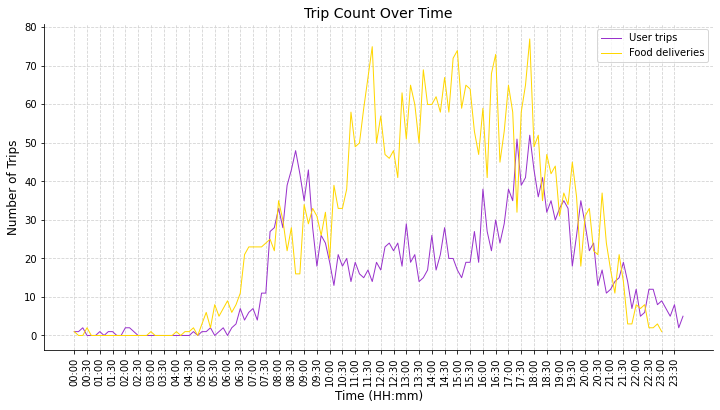

In [62]:
# Convert USER timestamp column to datetime format
df_user['timestamp'] = pd.to_datetime(df_user['starttime'])

# Set the timestamp column as the index
df_user.set_index('timestamp', inplace=True)

# Group the data by 15-minute intervals and count the number of rows
counts_user = df_user.resample('10Min').size().reset_index(name='count')


# Convert FOOD  timestamp column to datetime format
df_food['timestamp'] = pd.to_datetime(df_food['start_time'])

# Set the timestamp column as the index
df_food.set_index('timestamp', inplace=True)

# Group the data by 15-minute intervals and count the number of rows
counts_food = df_food.resample('10Min').size().reset_index(name='count')

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(counts_user.index, counts_user['count'], linewidth=1, color='darkorchid')
plt.plot(counts_food.index, counts_food['count'], linewidth=1, color='gold')

# Set the x-axis labels to hour:minute format
labels = counts_user['timestamp'].dt.strftime('%H:%M')
plt.xticks(counts_user.index[::3], labels[::3], rotation='vertical')

# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Food deliveries'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()
